In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).





[Ref](https://github.com/kroosen/GAN-in-keras-on-mnist)

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.layers import *
from tqdm import tqdm_notebook
import pandas as pd
from keras.utils import plot_model, to_categorical

# Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
# (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Using TensorFlow backend.


In [0]:
!ls

 2-balance_classified_by.csv  'balance_classified_train (1).csv'
 balance_classified_by.csv     balance_classified_train.csv
 balance_classified_by.xlsx    balance_classified_valid.csv
 balance_classified.csv


In [0]:
# cd /content/drive/My\ Drive/faraji/digikala

In [0]:
cd /content/drive/My Drive/zahra_Nafarieh/Digicala_NLP/GAN/GAN_NLP/vafaie_sadr/MY_GAN/dataset/

/content/drive/My Drive/zahra_Nafarieh/Digicala_NLP/GAN/GAN_NLP/vafaie_sadr/MY_GAN/dataset


In [0]:
df_train = pd.read_csv('2-balance_classified_by.csv')

X_train = df_train['comment']
y_train = df_train['class']
x_train_0 = df_train[ df_train['class']==0 ]['comment']
x_train_1 = df_train[ df_train['class']==1 ]['comment']
# x_train_2 = df_train[ df_train['class']==2 ]['comment']
# x_train_3 = df_train[ df_train['class']==3 ]['comment']

In [0]:
X_g = x_train_0
X_d = x_train_1


X_g.shape

(60716,)

In [0]:

num_features=50
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = num_features)
tokenizer.fit_on_texts(X_d)
tokenizer.fit_on_texts(X_g)

data_d = tokenizer.texts_to_sequences(X_d)
latent_g = tokenizer.texts_to_sequences(X_g)


d_data = pad_sequences(data_d, padding = "post", maxlen =64)
g_latent = pad_sequences(latent_g, padding = "post", maxlen =64)

In [0]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
# reverse_word_map

In [0]:
# Importing library
from keras.preprocessing.text import Tokenizer

# My texts
# texts = ['These are two crazy sentences', 'that I want to convert back and forth']

# Creating a tokenizer
# tokenizer = Tokenizer(lower=True)

# Building word indices
# tokenizer.fit_on_texts(texts)

# Tokenizing sentences
# sentences = tokenizer.texts_to_sequences(texts)

# >sentences
# >[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11, 12, 13]]

# Creating a reverse dictionary
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

# Function takes a tokenized sentence and returns the words
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

# Creating texts 
my_texts = list(map(sequence_to_text, data_d[:3]))

my_texts


[['استفاده', 'خیلی', 'تو'],
 ['رو',
  'پیشنهاد',
  'خریدم',
  'می',
  'هست',
  'هست',
  'بسیار',
  'داره',
  'رو',
  'ولی',
  'یه',
  'می',
  'چون',
  'باشه',
  'بسیار',
  'خوبه',
  'چون',
  'های',
  'ها',
  'های',
  'واقعا',
  'ای',
  'هست',
  'داره',
  'نیست',
  'کردم',
  'داره',
  'کردم',
  'می',
  'می',
  'هست'],
 ['نیست', 'ای', 'رو', 'رو', 'دیجی', 'کالا', 'ها', 'رو']]

In [0]:
# X_g=X_g[:60000]
g_latent.shape , d_data.shape #, X_train.shape

((60716, 64), (60000, 64))

In [0]:
word_index = tokenizer.word_index.items()
word_index

dict_items([('خیلی', 1), ('رو', 2), ('داره', 3), ('ولی', 4), ('هست', 5), ('استفاده', 6), ('کیفیت', 7), ('میشه', 8), ('خریدم', 9), ('های', 10), ('تو', 11), ('خوب', 12), ('یه', 13), ('نیست', 14), ('خوبه', 15), ('کردم', 16), ('واقعا', 17), ('اصلا', 18), ('می', 19), ('عالی', 20), ('عالیه', 21), ('بسیار', 22), ('فقط', 23), ('نداره', 24), ('قیمت', 25), ('خرید', 26), ('میکنم', 27), ('میکنه', 28), ('بعد', 29), ('پیشنهاد', 30), ('خوبی', 31), ('ها', 32), ('دیجی', 33), ('کالا', 34), ('کار', 35), ('راضی', 36), ('نسبت', 37), ('گوشی', 38), ('محصول', 39), ('کنید', 40), ('شارژ', 41), ('چون', 42), ('روی', 43), ('ای', 44), ('باشه', 45), ('دیگه', 46), ('قیمتش', 47), ('سلام', 48), ('کل', 49), ('اینکه', 50), ('ازش', 51), ('اگه', 52), ('کنم', 53), ('بی', 54), ('هیچ', 55), ('گرفتم', 56), ('دستگاه', 57), ('ارزش', 58), ('رنگ', 59), ('البته', 60), ('حتما', 61), ('جنس', 62), ('وقتی', 63), ('توی', 64), ('چند', 65), ('دارم', 66), ('اون', 67), ('مناسب', 68), ('کاملا', 69), ('ساعت', 70), ('دوستان', 71), ('کم', 72), 

In [0]:
print(len(tokenizer.word_index))

52631


In [0]:
z= len(tokenizer.word_index)

In [0]:

# Set the dimensions of the noise
z_dim = 64

In [0]:

# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

In [0]:
#Genaraitor
d = Sequential()

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



# d.add(LSTM(256, input_shape=(1,64)))

d.add(Dense(256, input_dim=z_dim))
d.add(LeakyReLU(alpha=0.2))
#@@@@@
d.add(Reshape((1, 2*64, 2)))
d.add(BatchNormalization())
# d.add(Activation(LeakyReLU(alpha=0.2)))
d.add(LeakyReLU(alpha=0.2))
d.add(Conv2DTranspose(56, 5, strides=2, padding='same'))
#@@@@@
#@@@@@
d.add(Dense(512))
d.add(LeakyReLU(alpha=0.2))
d.add(BatchNormalization())
# d.add(Activation(LeakyReLU(alpha=0.2)))
d.add(LeakyReLU(alpha=0.2))
# d.add(Conv2DTranspose(1, 5, strides=2, padding='same', activation=LeakyReLU(alpha=0.2)))
d.add(Conv2DTranspose(1, 5, strides=2, padding='same'))
d.add(LeakyReLU(alpha=0.2))

#@@@@@
d.add(BatchNormalization())
# d.add(Activation(LeakyReLU(alpha=0.2)))
d.add(LeakyReLU(alpha=0.2))
d.add(Reshape((2*64,-1)))
d.add(LSTM(256, input_shape=(1,64)))
#@@@@@
d.add(Dense(1024))
d.add(LeakyReLU(alpha=0.2))
#@@@@@
d.add(BatchNormalization())
# d.add(Activation(LeakyReLU(alpha=0.2)))
d.add(LeakyReLU(alpha=0.2))
#@@@@@
# d.add(Dense(1, activation='sigmoid'))  # Values between 0 and 1
# d.add(Dense(1, activation=LeakyReLU(alpha=0.2)))  # Values between 0 and 1
d.add(Dense(1))
d.add(LeakyReLU(alpha=0.2))

# d.add(Reshape((-1, 64)))
d.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']  )














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
d.summary()
# plot_model(g, to_file='generaitor.png', show_shapes=True)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 128, 2)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 128, 2)         8         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1, 128, 2)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 2, 256, 56)        2856      
_________________________________________________________________
dense_2 (Dense)              (None, 2, 256, 512)      

In [0]:
#Discriminator
g = Sequential()
# g.add(Reshape((-1, 64)))

g.add(Embedding(256, 64, input_length=64))
g.add(Reshape((-1, 64)))
g.add(LSTM(256, input_shape=(1,64)))

g.add(Dense(256, input_dim=64))
#@@@@@
g.add(BatchNormalization())
g.add(LeakyReLU(alpha=0.2))
#@@@@@
g.add(Dropout(0.3))
g.add(Dense(512))
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@
g.add(BatchNormalization())
# g.add(Activation(LeakyReLU(alpha=0.2)))
g.add(LeakyReLU(alpha=0.2))
# d.add(Conv2DTranspose(1, 5, strides=2, padding='same', activation='softmax'))
#@@@@@
g.add(BatchNormalization())
# g.add(Activation(LeakyReLU(alpha=0.2)))
g.add(LeakyReLU(alpha=0.2))
g.add(Reshape((1*64,-1)))
g.add(LSTM(256, input_shape=(1,64)))
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# g.add(Reshape((-1, 64)))
# g.add(LSTM(256, input_shape=(1,64)))
g.add(BatchNormalization())
# g.add(Activation(LeakyReLU(alpha=0.2)))
g.add(LeakyReLU(alpha=0.2))
#@@@@@
g.add(Dropout(0.3))
g.add(Dense(256))
#@@@@@
g.add(BatchNormalization())
# g.add(Activation(LeakyReLU(alpha=0.2)))
g.add(LeakyReLU(alpha=0.2))
#@@@@@
g.add(Dropout(0.3))
# g.add(Dense(64, activation='sigmoid'))  # Values between 0 and 1
g.add(Dense(64, activation='softmax'))  # Values between 0 and 1
# g.add(Dense(64, activation=LeakyReLU(alpha=0.2)))  # Values between 0 and 1
g.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']  )

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
g.summary()
# plot_model(d, to_file='discriminator.png', show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 64, 64)            16384     
_________________________________________________________________
reshape_3 (Reshape)          (None, 64, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [0]:
#GAN
d.trainable = False
inputs = Input(shape=(z_dim, ))
hidden = g(inputs)
output = d(hidden)
gan = Model(inputs, output)
gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']  )

In [0]:
gan.summary()
# plot_model(gan, to_file='generator.png', show_shapes=True)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 64)                903232    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 611382    
Total params: 1,514,614
Trainable params: 899,648
Non-trainable params: 614,966
_________________________________________________________________


In [0]:
def plot_loss(losses):
    """
    @losses.keys():
        0: loss
        1: accuracy
    """
    d_loss = [v[0] for v in losses["D"]]
    g_loss = [v[0] for v in losses["G"]]
    #d_acc = [v[1] for v in losses["D"]]
    #g_acc = [v[1] for v in losses["G"]]
    
    plt.figure(figsize=(10,8))
    plt.plot(d_loss, label="Discriminator loss")
    plt.plot(g_loss, label="Generator loss")
    #plt.plot(d_acc, label="Discriminator accuracy")
    #plt.plot(g_acc, label="Generator accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
# def plot_generated(n_ex=10, dim=(1, 10), figsize=(12, 2)):
#     noise = np.random.normal(0, 1, size=(n_ex, z_dim))
#     generated_images = g.predict(noise)
#     generated_images = generated_images.reshape(n_ex, 28, 28)

#     plt.figure(figsize=figsize)
#     for i in range(generated_images.shape[0]):
#         plt.subplot(dim[0], dim[1], i+1)
#         plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
#         plt.axis('off')
#     plt.tight_layout()
#     plt.show()


In [0]:
# Set up a vector (dict) to store the losses
losses = {"D":[], "G":[]}

def train(epochs=10, plt_frq=1, BATCH_SIZE=128):
    batchCount = int(d_data.shape[0] / BATCH_SIZE)
    # print('Epochs:', epochs)
    # print('Batch size:', BATCH_SIZE)
    # print('Batches per epoch:', batchCount)
    
    for e in tqdm_notebook(range(1, epochs+1)):
        if e == 1 or e%plt_frq == 0:
            print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batchCount):  # tqdm_notebook(range(batchCount), leave=False):
            # Create a batch by drawing random index numbers from the training set
            text_batch = d_data[np.random.randint(0, z, size=BATCH_SIZE)]
            # Create noise vectors for the generator

            #@@@@@@@@@
            # noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            noise = g_latent[np.random.randint(0, z, size=BATCH_SIZE)]
            # print(noise.shape)
            #@@@@@@@

            # Generate the images from the noise
            generated_texts = g.predict(noise)

            # print("noise.shape ,text_batch.shape , generated_texts.shape" , noise.shape ,text_batch.shape , generated_texts.shape )

            X = np.concatenate((text_batch, generated_texts))
            # Create labels
            y = np.zeros(2*BATCH_SIZE)
            y[:BATCH_SIZE] = 1#0.9  # One-sided label smoothing
            #@@@@@@@@
            ####

            # Train discriminator on generated images
            d.trainable = True
            d_loss = d.train_on_batch(X, y)

            # Train generator
            # noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            noise = g_latent[np.random.randint(0, g_latent.shape[0], size=BATCH_SIZE)]

            #@@@@@@
            # print(noise.shape)

            y2 = np.ones(BATCH_SIZE)
            # d.trainable = False
            d.trainable = False

            g_loss = gan.train_on_batch(noise, y2)

            #@@@@@@@
            # l, l_rf, acc_rf, l_labels, acc_labels = gan.train_on_batch(noise, y2)  
        # Only store losses from final batch of epoch
        losses["D"].append(d_loss)
        losses["G"].append(g_loss)

        # Update the plots
        # if e == 1 or e%plt_frq == 0:
            # plot_generated()
    plot_loss(losses)

--------------- Epoch 1 ---------------


--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------



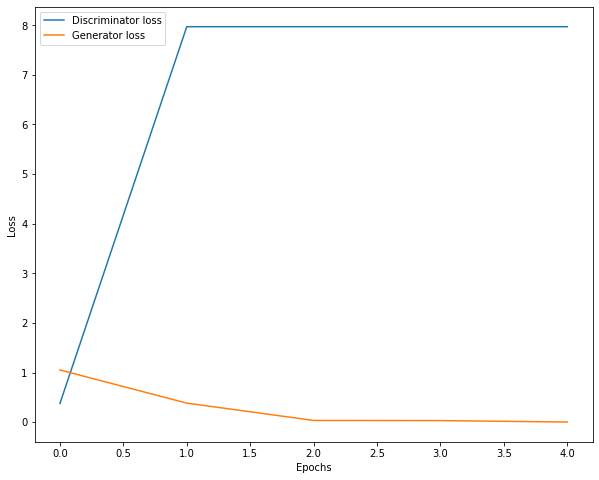

In [22]:
train(epochs= 5 , plt_frq=1, BATCH_SIZE=128)

In [0]:
g.save("generaitor.h5")
d.save("discriminator.h5")

In [23]:
noise = g_latent[np.random.randint(0, z, size=64)]
print(noise.shape)
noise

(64, 64)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [18,  9, 36, ...,  0,  0,  0],
       [ 6, 22,  6, ...,  0,  0,  0],
       ...,
       [44, 44, 20, ...,  0,  0,  0],
       [22, 20, 26, ...,  0,  0,  0],
       [ 6, 29, 17, ...,  0,  0,  0]], dtype=int32)

In [24]:
generated_texts = g.predict(noise)
generated_texts


array([[4.77333524e-04, 2.58407781e-05, 2.75889652e-05, ...,
        5.14764385e-03, 9.79947581e-05, 2.92806562e-05],
       [5.05657983e-04, 2.56631884e-05, 2.69126722e-05, ...,
        5.50706498e-03, 1.01523496e-04, 2.89310192e-05],
       [4.78363538e-04, 2.58390482e-05, 2.75498369e-05, ...,
        5.15855756e-03, 9.80421246e-05, 2.92548593e-05],
       ...,
       [4.77989088e-04, 2.58441069e-05, 2.75606726e-05, ...,
        5.15667768e-03, 9.80500045e-05, 2.92754921e-05],
       [4.78263682e-04, 2.58417349e-05, 2.75513612e-05, ...,
        5.15974360e-03, 9.80735495e-05, 2.92687855e-05],
       [4.81913652e-04, 2.58406253e-05, 2.74427457e-05, ...,
        5.20008104e-03, 9.83548234e-05, 2.92056593e-05]], dtype=float32)

In [33]:
print(generated_texts.shape )
print(np.argmax(generated_texts[1:2,1:2]) )


(64, 64)
0


In [0]:
k=[]
for i in range(64):
    for j in range(64):
        generated_texts_word = np.argmax(generated_texts)
        print(generated_texts_word)
        k.append(generated_texts_word)

In [26]:
generated_texts_word

2567

In [0]:
losses

[GAN — Ways to improve GAN performance](https://towardsdatascience.com/gan-ways-to-improve-gan-performance-acf37f9f59b)

![](https://miro.medium.com/max/1200/1*8dMXLw6Z3pCozGHrZxLOrA.png)